In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

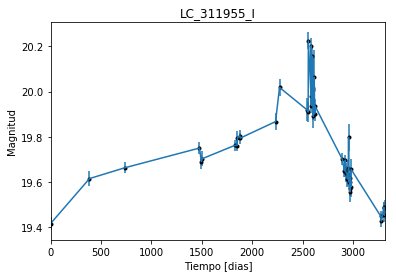

In [2]:
data = np.genfromtxt('LC_311955_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311955_I')
plt.savefig("LC_311955_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

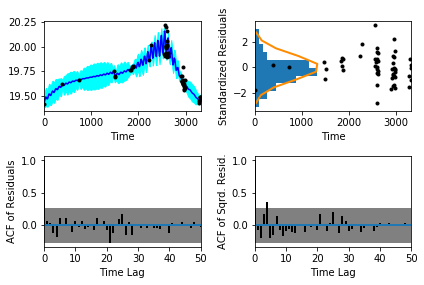

In [5]:
sample.assess_fit()

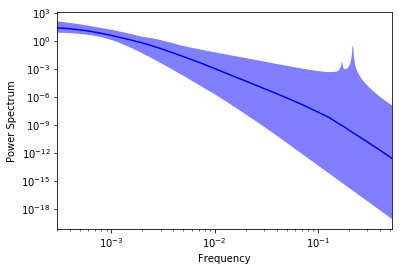

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

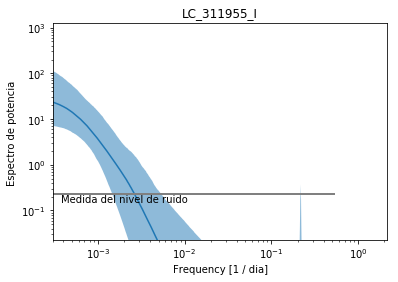

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311955_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311955_I')

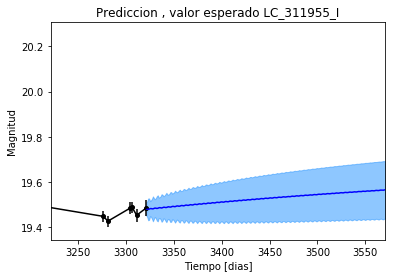

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311955_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311955_I')

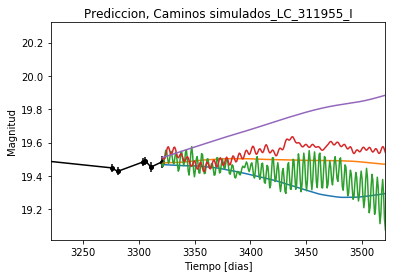

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311955_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


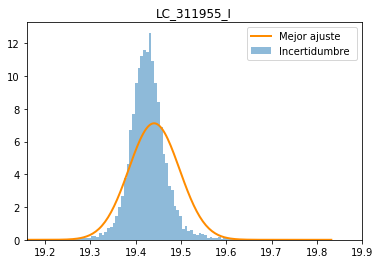

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311955_I')
plt.savefig("Mejor_ajuste_LC_311955_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311955_I')

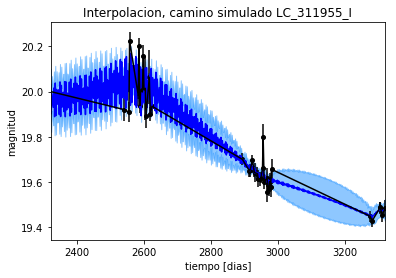

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_I')

Text(0.5,1,'Interpolacion, camino simulado LC_311955_I')

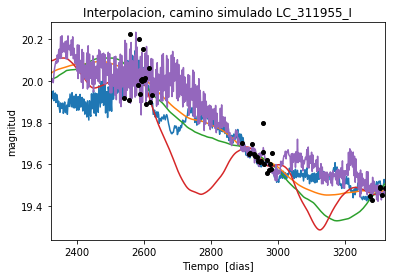

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 381.970913801
Median: 0.0033245541938
Standard deviation: 0.172560695298
68% credibility interval: [ 0.00053643  0.09769536]
95% credibility interval: [  3.27792189e-04   6.89799094e-01]
99% credibility interval: [  3.07257010e-04   1.00960943e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1661.46606873
Median: 0.000834398862765
Standard deviation: 0.0859261207532
68% credibility interval: [ 0.00038632  0.00632085]
95% credibility interval: [ 0.00031334  0.16183246]
99% credibility interval: [  3.04112803e-04   6.82573641e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 382.687210573
Median: 0.0449925050099
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 36.5776566726
Median: 76.9173599274
Standard deviation: 3.80618845972
68% credibility interval: [ 75.17406623  82.27957402]
95% credibility interval: [ 72.76276555  87.16605478]
99% credibility interval: [ 70.75907886  87.91292899]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 287.450327915
Median: 0.685466883108
Standard deviation: 1.95136798807
68% credibility interval: [ 0.06282867  3.10342494]
95% credibility interval: [ 0.01277223  6.52864371]
99% credibility interval: [  8.99876427e-03   1.15327741e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 670.719338885
Median: 0.363129664647
Standard deviation: 8.21600853537
68% credibility interval: [ 0.00935722  2.60755284]
95% credibility interval: [  5.7

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 3.50844723034e-46
Standard deviation: 1.70629302384e+15
68% credibility interval: [  3.85433311e-78   5.10155542e-09]
95% credibility interval: [  1.86779157e-116   1.78826175e+001]
99% credibility interval: [  2.00689724e-127   6.90103836e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1320.81655537
Median: 19.670824398
Standard deviation: 0.118516496961
68% credibility interval: [ 19.56591458  19.76863231]
95% credibility interval: [ 19.42155043  19.89838636]
99% credibility interval: [ 19.28649381  20.04016527]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 291.080264378
Median: 0.0021507482732
Standard deviation: 0.207332806349
68% credibility interval: [ 0.          0.21881307]
95% credibility interval: [ 0.         0.8322203]
99% credibility interval: [ 0.          0.98736313]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 291.080264378
Median: 0.0021507482732
Standard deviation: 0.207332806349
68% credibility interval: [ 0.          0.21881307]
95% credibility interval: [ 0.         0.8322203]
99% credibility interval: [ 0.          0.98736313]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 614.990804988
Median: 0.0
Standard deviation: 0.000268760226096
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 36.5776566726
Median: 76.9173599274
Standard deviation: 3.80618845972
68% credibility interval: [ 75.17406623  82.27957402]
95% credibility interval: [ 72.76276555  87.16605478]
99% credibility interval: [ 70.75907886  87.91292899]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1021.15661276
Median: 0.0415979557683
Standard deviation: 0.0534811758457
68% credibility interval: [ 0.02522292  0.07963875]
95% credibility interval: [ 0.01714576  0.16990091]
99% credibility interval: [ 0.01368356  0.33479408]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 51.5864727313
Median: 1.69277692418
Standard deviation: 0.301100610673
68% credibility interval: [ 1.27684788  1.89253375]
95% credibility interval: [ 0.89379186  1.98276452]
99% credibility interval: [ 0.73498375  1.99659309]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 69.5569851305
Median: 6.18956304688e-05
Standard deviation: 0.0108356051512
68% credibility interval: [  9.31088629e-07   1.09526808e-02]
95% credibility interval: [  3.28589318e-08   3.17582248e-02]
99% credibility interval: [  5.69691700e-09   5.06785639e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 381.970913801
Median: (-0.0208887900634-2.93867831498j)
Standard deviation: 1.6948778657
68% credibility interval: [-0.61383806-0.83820032j -0.00337050-3.06791022j]
95% credibility interval: [ -4.33413553e+00+0.j          -2.05957906e-03-1.35980599j]
99% credibility interval: [ -6.34356311e+00+0.j          -1.93055273e-03-0.00286669j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1661.46606873
Median: (-0.00524268267485+0.687690321494j)
Standard deviation: 1.41015439859
68% credibility interval: [-0.03971510+0.07471881j -0.00242734+0.j        ]
95% credibility interval: [-1.01682332+1.60584275j -0.00196874+0.j        ]
99% credibility interval: [ -4.28873667e+00+3.17184104j  -1.91079710e-03+0.j        ]
Posterior sum